In [132]:
import matplotlib.pyplot as plt

In [133]:
class vertex :
    def __init__ (self , x , y , tipo = None):
        self.x = x
        self.y = y
        self.tipo = tipo
    
    def __str__(self):
        return  f"""  (x: {self.x}, y:{self.y}, tipo: {self.tipo})  """

    def __repr__(self):
        return  f"""  (x: {self.x}, y:{self.y}, tipo: {self.tipo})  """
    
    def __lt__(self,other):
        if (self.y < other.y or self.y == other.y and self.x > other.x):
            return True 
        else:
            return False        
    def __gt__(self,other):
        if (self.y > other.y or self.y == other.y and self.x > other.x):
            return True 
        else:
            return False

class dlcEdge :
    def __init__ (self , start , end , next_edge =None, helper = None):
        self.start = start
        self.end = end
        self.next = next_edge
        self.helper = helper
    
    def __str__(self):
        return  f"({self.start}, {self.end})"

    def __repr__(self):
        return  f"({self.start}, {self.end})"
    
    
class Node:
   def __init__(self, data = None):
      self.left = None
      self.right = None
      self.data = data

   def insert(self, data):
# Compare the new value with the parent node
      if self.data:
         if data < self.data:
            if self.left is None:
               self.left = Node(data)
            else:
               self.left.insert(data)
         elif data > self.data:
               if self.right is None:
                  self.right = Node(data)
               else:
                  self.right.insert(data)
      else:
         self.data = data

# Print the tree
   def PrintTree(self):
      if self.left:
         self.left.PrintTree()
      print( self.data),
      if self.right:
         self.right.PrintTree()
         
   def delete_node(self, key):
        if self is None:
            return self

        if key < self.data:
            self.left = self.left.delete_node(key)
        elif key > self.data:
            self.right = self.right.delete_node(key)
        else:
            if self.left is None:
                temp = self.right
                self = None
                return temp
            elif self.right is None:
                temp = self.left
                self = None
                return temp

            temp = self._min_value_node(self.right)
            self.data = temp.data
            self.right = self.right.delete_node(temp.data)

        return self


In [134]:
def prod(v,w):
    return v[0]*w[1] -w[0]*v[1]

def minus(v,w):
    return (v[0]-w[0],v[1]-w[1])
    # regresa a que tipo de vertice corresponde v2 , si v1 y v3 son sus vecinos dentro del poligono
    #que en sentido antihorario recorre de v1 -> v2 -> v3
def type(v1, v2, v3):
    if min(v1[1],v3 [1]) >=v2 [1]:
        if prod(minus(v1 ,v2),minus(v3 ,v2)) >0:
            return 'merge'
        else:
            return 'end'
    elif max(v1[1],v3 [1]) <= v2 [1]:
        if prod(minus(v1 ,v2),minus(v3 ,v2)) >0:
            return 'split'
        else:
            return 'start'
    return 'regular'

In [135]:
def plotPoints(vertex_list):
    x = []
    y = []

    for i in vertex_list:
        x.append(i[0])
        y.append(i[1])       
    x.append(vertex_list[0][0])  
    y.append(vertex_list[0][1]) 
        
    plt.plot(x, y, color='green', linestyle='dashed', linewidth = 3,
        marker='o', markerfacecolor='blue', markersize=12)
    
    
    plt.ylim(-1,11)
    plt.xlim(-1,11)
    
    # naming the x axis
    plt.xlabel('x - axis')
    # naming the y axis
    plt.ylabel('y - axis')
    

def plotPointsTypes(vertex_list):

    x = []
    y = []
    markers = []

    for i in vertex_list:
        print(i)
        x.append(i.x)
        y.append(i.y)
        markers.append(get_marker_for_attribute(i.tipo))  # Get appropriate marker

    x.append(vertex_list[0].x)  # Close the loop
    y.append(vertex_list[0].y)
    markers.append(get_marker_for_attribute(vertex_list[0].tipo))
    

    plt.plot(x, y, color='green', linestyle='dashed', linewidth=3)

    # Plot each point individually with its specific marker
    for i in range(len(x)):
        plt.plot(x[i], y[i], marker=markers[i], markerfacecolor='blue', markersize=12)

    plt.ylim(-1, 11)
    plt.xlim(-1, 11)
    plt.xlabel('x - axis')
    plt.ylabel('y - axis')

# Define a function to map attribute values to markers
def get_marker_for_attribute(attribute_value):
    # Customize this mapping based on your needs
    if attribute_value == 'merge':
        return 'v'
    elif attribute_value == 'end':
        return 's'
    elif attribute_value == 'split':
        return '^'
    elif attribute_value == 'start':
        return '8'
    elif attribute_value == 'regular':
        return 'o'


In [136]:
def gen_dcl_de_seq(seq):
    l_seq=len(seq)
    dledge_0 = dlcEdge(seq [0], seq [1])
    dledge = dledge_0
    i=1
    while i < l_seq -1:
        dledge.next= dlcEdge (seq[i], seq[i+1])
        dledge = dledge.next
        i+=1
    dledge.next= dlcEdge (seq[l_seq -1], seq [0])
    dledge = dledge.next
    dledge.next = dledge_0
    return dledge_0

def pointsToVerts(points):
    verts = []
    for i in range(len(points)-1): 
        tipo = type(points[i-1], points[i], points[i+1])
        x = points[i][0]
        y = points[i][1]
        vert = vertex(x,y,tipo)
        verts.append(vert)
    tipo = type(points[-2], points[-1], points[0])
    x = points[-1][0]
    y = points[-1][1]
    vert = vertex(x,y,tipo)
    verts.append(vert)
            
    return(verts)

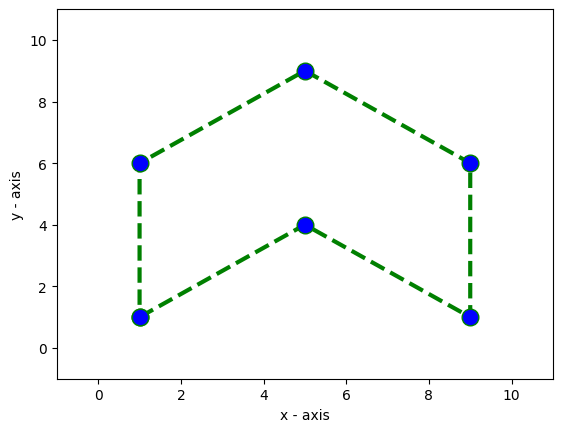

In [137]:
test_case = [(1,1),(5, 4),(9,1),(9,6),(5,9),(1, 6)]

plotPoints(test_case)
 

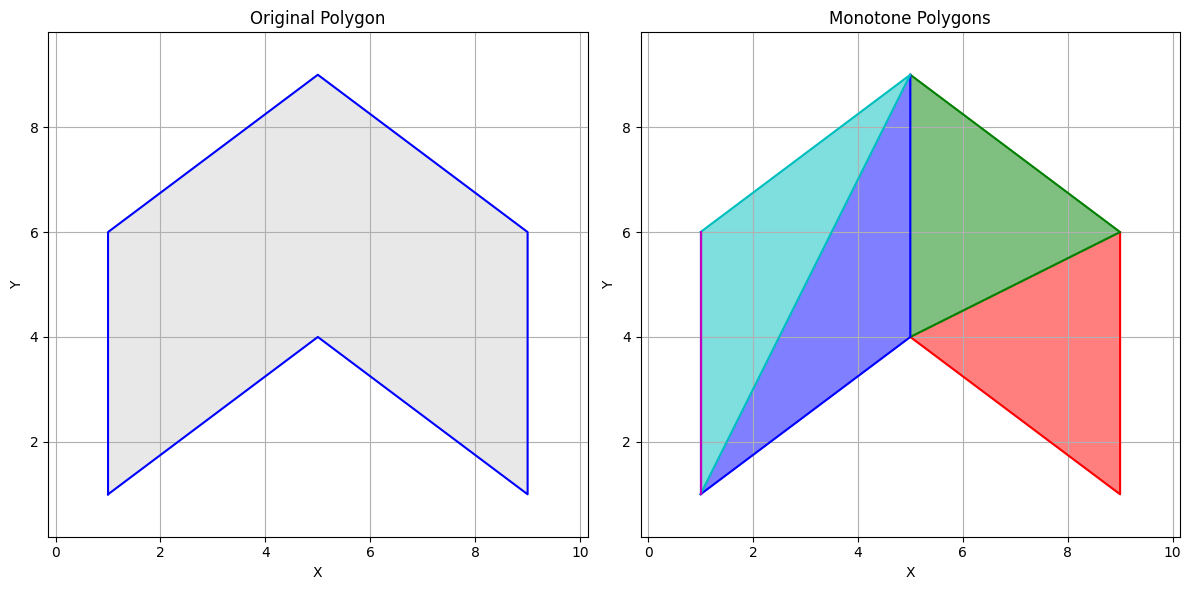

In [1]:
import matplotlib.pyplot as plt

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __repr__(self):
        return f"({self.x}, {self.y})"

class LineSegment:
    def __init__(self, start, end):
        self.start = start
        self.end = end

    def __repr__(self):
        return f"{self.start} -> {self.end}"

def is_convex(p1, p2, p3):
    # Check if three points form a convex turn
    cross_product = (p2.x - p1.x) * (p3.y - p1.y) - (p3.x - p1.x) * (p2.y - p1.y)
    return cross_product < 0

def partition_polygon(polygon):
    monotones = []
    vertex_stack = []
    n = len(polygon)

    # Check if the polygon is in clockwise or counterclockwise order
    is_clockwise = 0
    for i in range(n):
        is_clockwise += (polygon[(i + 1) % n].x - polygon[i].x) * (polygon[(i + 1) % n].y + polygon[i].y)
    is_clockwise = is_clockwise >= 0

    # Create monotone polygons
    for i in range(n):
        # Form triangles with consecutive vertices
        while len(vertex_stack) >= 2:
            if is_convex(vertex_stack[-2], vertex_stack[-1], polygon[i]) == is_clockwise:
                monotones.append([vertex_stack[-2], vertex_stack[-1], polygon[i]])
                vertex_stack.pop()
            else:
                break
        vertex_stack.append(polygon[i])

    return monotones

def plot_polygon(polygon, title="Polygon"):
    x = [point.x for point in polygon]
    y = [point.y for point in polygon]
    plt.plot(x, y, 'b-')
    plt.fill(x, y, color='lightgray', alpha=0.5)
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.axis('equal')

def plot_monotones(monotones):
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
    for i, monotone in enumerate(monotones):
        x = [point.x for point in monotone]
        y = [point.y for point in monotone]
        plt.plot(x, y, color=colors[i % len(colors)], linestyle='-')
        plt.fill(x, y, color=colors[i % len(colors)], alpha=0.5)

    plt.title('Monotone Polygons')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.axis('equal')

# Example usage
polygon = [
    Point(1,1),
    Point(5, 4),
    Point(9,1),
    Point(9,6),
    Point(5,9),
    Point(1, 6),
    Point(1,1)
]

#polygon = [Point(0, 2), Point(3, 4), Point(7, 8), Point(9, 9), Point(10, 7), Point(10, 4), Point(0, 2)]

monotones = partition_polygon(polygon)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_polygon(polygon, title="Original Polygon")

plt.subplot(1, 2, 2)
plot_monotones(monotones)

plt.tight_layout()
plt.show()


  (x: 1, y:1, tipo: end)  
  (x: 5, y:4, tipo: split)  
  (x: 9, y:1, tipo: end)  
  (x: 9, y:6, tipo: regular)  
  (x: 5, y:9, tipo: start)  
  (x: 1, y:6, tipo: regular)  


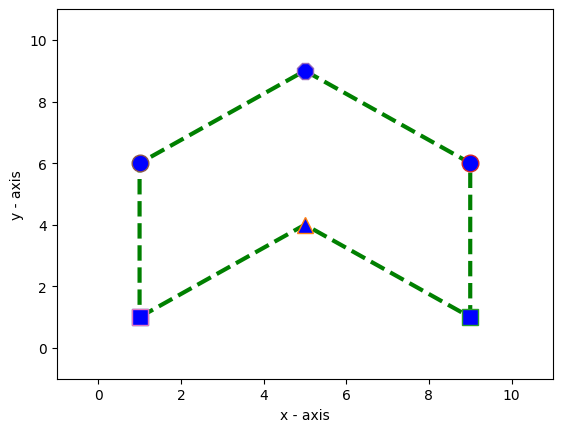

In [138]:
vertices = pointsToVerts(test_case)
plotPointsTypes(vertices)

### HELPER FUNCTIONS

In [139]:
def dlc_to_list(segs, len):
    e = []
    ei = segs
    for i in range(len):  
        e.append(ei)
        ei = ei.next
    return e

def makePriorityQueue(verts):
    q = sorted(verts, reverse=True)
    return(q)

In [140]:
def makeMonotone(vertex):
    #SETUP
    segmentos = gen_dcl_de_seq(vertices)
    
    q = makePriorityQueue(vertex) #Event queue
    e = dlc_to_list(segmentos, len(vertex))  #Aristas
    d = [] #Diagonales 
    t = Node() #Estatus sweep line
    
    i = 0
    
    while (len(q) > 0):
        vi = q.pop(0) #ELIMINAR EL ELEMENTO CON MAYOR PRIORIDAD
        
        if (vi.tipo == "start"):
            t.insert(e[i]) 
            e[i].helper = vi

        elif (vi.tipo == "end"):
            if(e[i-1].helper.tipo == "merge"):
                diag = (vi, e[i-1].helper)
                d.append(diag)
            t.remove(e[i-1])
            
        elif (vi.tipo == "split"):
            ###########
            ej = 0 #?
            #Searth in t to find the edge ej directly left of vi
            ###########
            diag = (vi, ej.helper)
            d.append(diag)
            ej.helper = vi
            t.insert(e[i])
            e[i].helper = vi
            
        elif (vi.tipo == "merge"):
            if (e[i-1].helper.tipo == "merge"):
                diag = (vi, e[i-1].helper)
                d.append(diag)
            t.delete_node(e[i-1])
            ###########
            ej = 0 #?
            #Searth in t to find the edge ej directly left of vi
            ###########
            if (ej.helper.tipo == "merge"):
                diag = (vi, ej.helper)
                d.append(diag)
            ej.helper = vi
            
            
        elif (vi.tipo == "regular"):
            pass
        i += 1

    return(d)

In [141]:
makeMonotone(vertices)

AttributeError: 'NoneType' object has no attribute 'tipo'